**Purpose of the notebook: Plot crude oil prices vs retail fuel prices for each fuel.**

In [1]:
import os
os.chdir("C:/Users/zetru/OneDrive/Mémoire python/")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 16, 9
plt.rcParams['axes.grid'] = True
import seaborn as sns
sns.set_theme(style="whitegrid")

In [2]:
df=pd.read_hdf('df_v5.h5','df_v5')

In [3]:
df['nom_carburant'] = df['nom_carburant'].replace({'E10': 'SP95-E10'})

In [4]:
df_ar=(pd.DataFrame(df.groupby(['type','nom_carburant','maj'])['valeur'].mean()))

In [5]:
df_ar=df_ar.reset_index()
df_ar

,type,nom_carburant,maj,valeur
0,A,E85,2022-01-01,0.580212
1,A,E85,2022-01-02,0.580259
2,A,E85,2022-01-03,0.574908
3,A,E85,2022-01-04,0.577283
4,A,E85,2022-01-05,0.577245
...,...,...,...,...
4304,R,SP98,2022-12-27,0.825403
4305,R,SP98,2022-12-28,0.826612
4306,R,SP98,2022-12-29,0.841828
4307,R,SP98,2022-12-30,0.846912


In [6]:
df_ar=df_ar[~(df_ar['nom_carburant'].isin(['GPLc','SP95']))]

In [7]:
df_ar['type'].unique()

array(['A', 'R'], dtype=object)

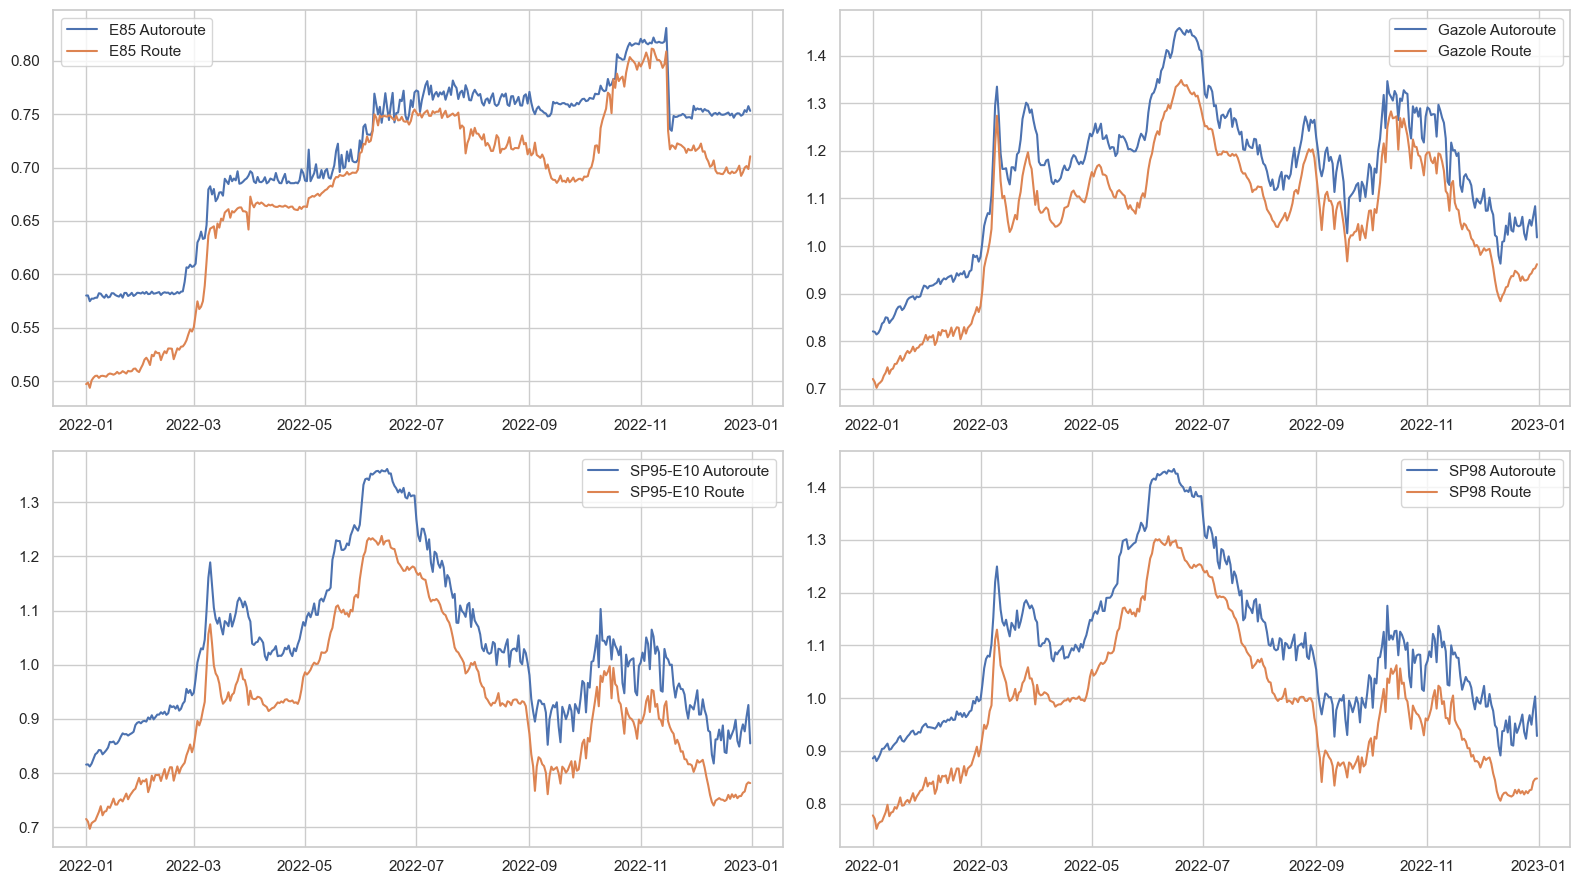

In [8]:
import matplotlib.pyplot as plt
plt.rcParams['axes.grid'] = True
fig, axs = plt.subplots(2, 2, figsize=(16, 9))
n_lignes=2
n_colonnes=3
compte=0
i=0
j=0
for nom in df_ar['nom_carburant'].unique():
    df_mask=df_ar[df_ar['nom_carburant']==nom]
    for type_ar in df_mask['type'].unique():
        ax=axs[i,j]
        if type_ar=='A':
            type_station='Autoroute'
        else:
            type_station='Route'
        df_mask2=df_mask[df_mask['type']==type_ar]
        ax.plot(df_mask2['maj'],df_mask2['valeur'],label=f'{nom} {type_station}')
        ax.legend()
    j+=1
    if j==2:
        j=0
        i+=1
plt.tight_layout()
plt.savefig('graph/comparaison_prix_autoroute.png')
plt.show()


 # sns.relplot(data=df_ar,x='maj',y='valeur',kind='line',hue='type',col='nom_carburant',col_wrap=2, height=4,aspect=1.5)

In [68]:
df_ar['type']=df_ar['type'].replace({'A':'Autoroute','R':'Route'})

C:\Users\zetru\AppData\Local\Temp\ipykernel_23104\3364412274.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ar['type']=df_ar['type'].replace({'A':'Autoroute','R':'Route'})


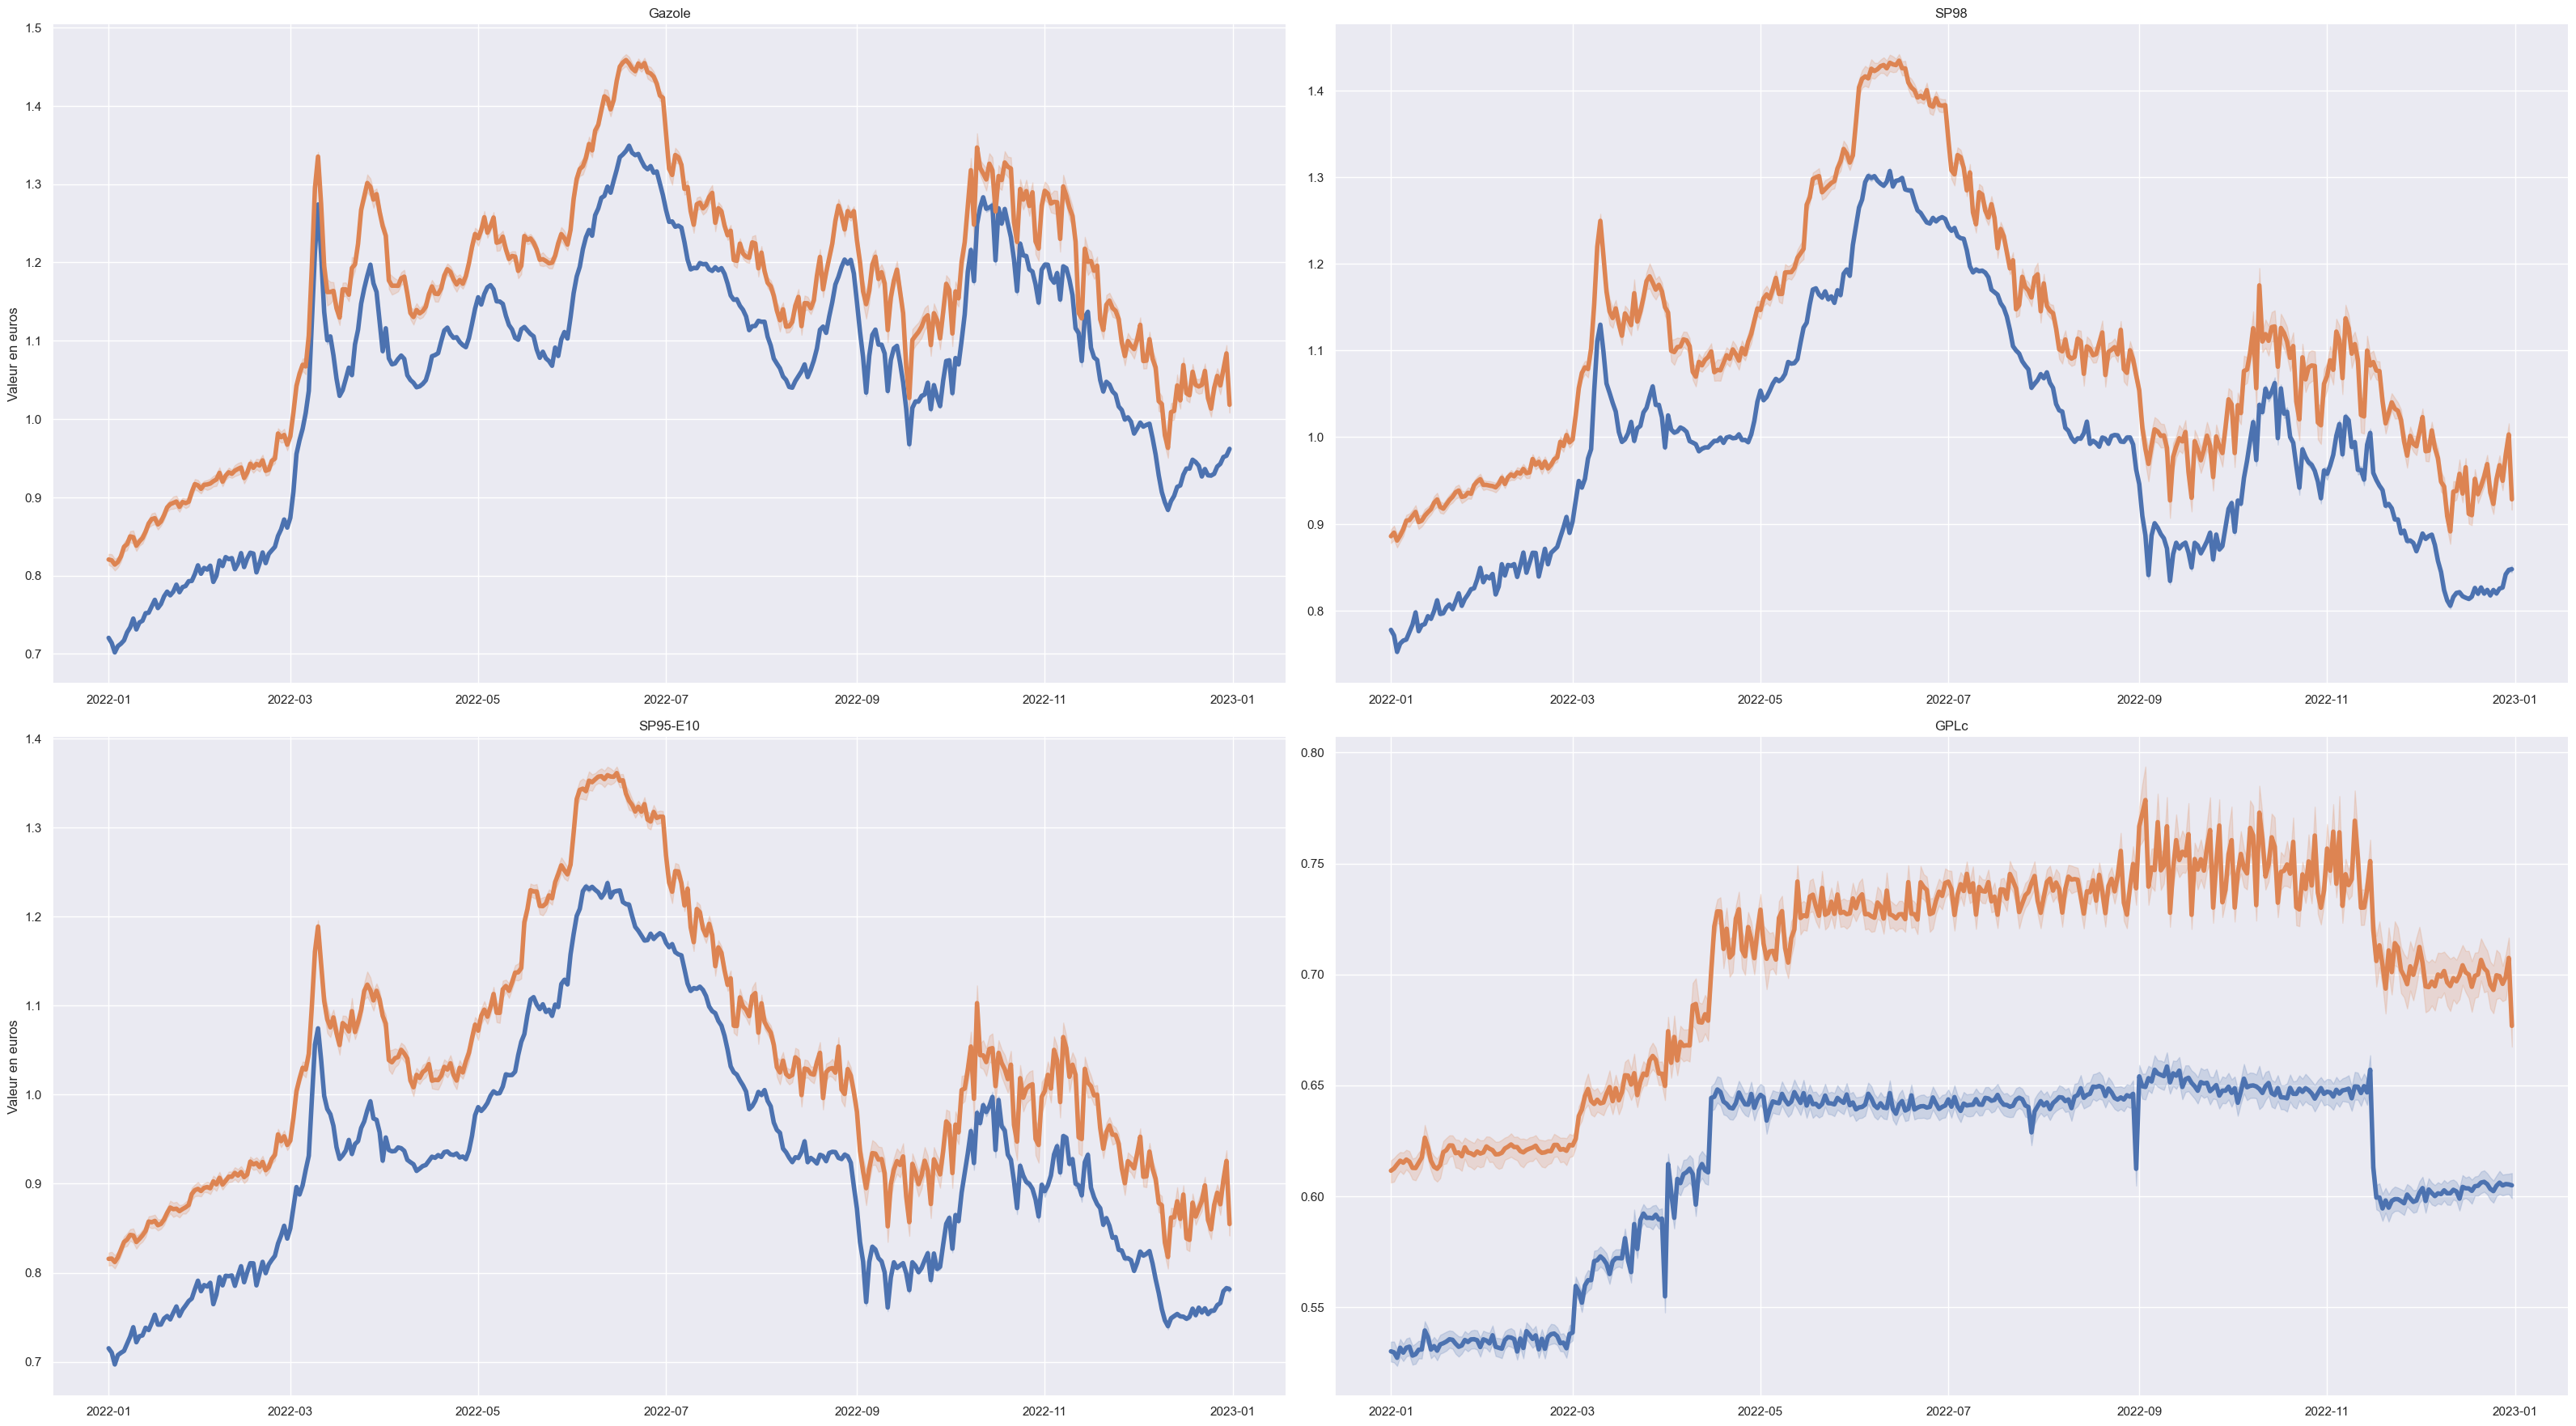

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="darkgrid")
# Créer le graphique en utilisant FacetGrid et map pour plus de flexibilité
g = sns.FacetGrid(
    df[df['nom_carburant'].isin(['SP95-E10','SP98','Gazole', 'GPLc'])], 
    col='nom_carburant', 
    hue='type', 
    col_wrap=2,
    height=9, 
    aspect=16/9, 
    sharey=False, 
    sharex=False
)

# Ajout des lignes dans chaque sous-graphe
g.map(sns.lineplot,'maj' ,'valeur', linewidth=4).set_titles("{col_name}", size=12).set_xlabels('').set_ylabels('Valeur en euros')
plt.show()


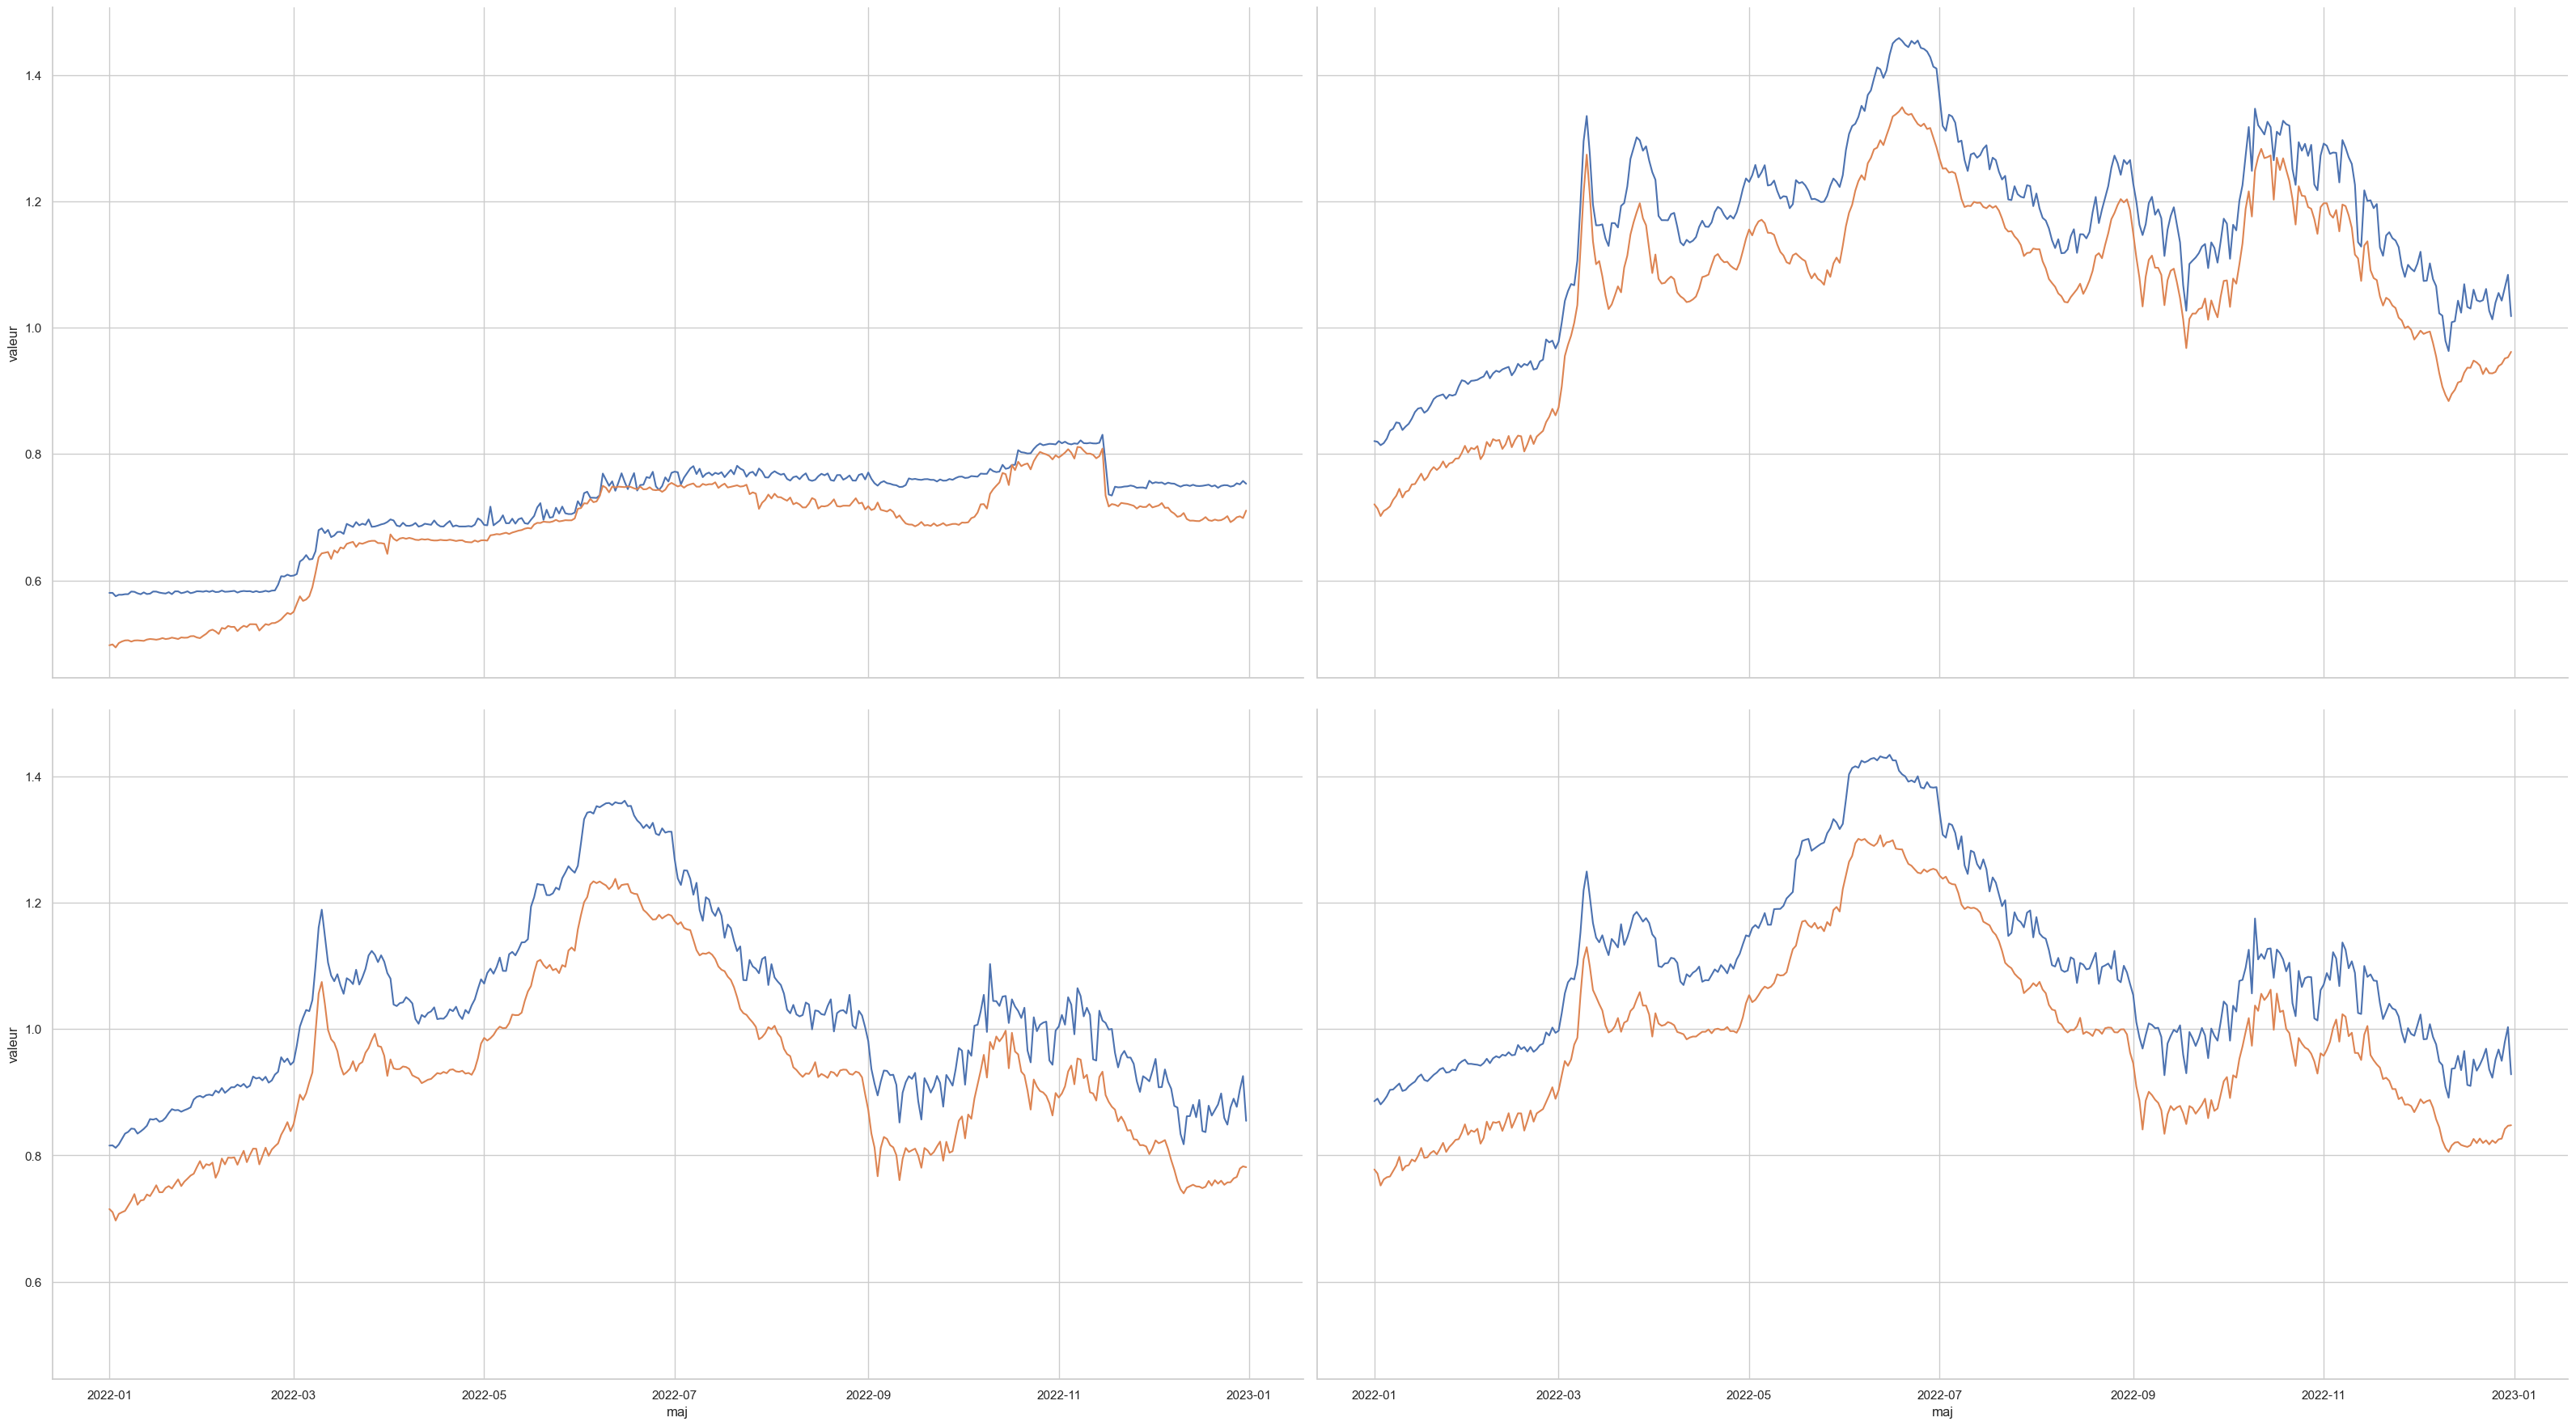

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Création du FacetGrid
g = sns.FacetGrid(df_ar, col='nom_carburant', hue='type', col_wrap=2, height=9, aspect=16/9, sharex=True)

# Ajout du graphique en ligne pour chaque Facet
g.map(sns.lineplot, 'maj', 'valeur')

# Paramètres additionnels
g.set_titles('')  # Supprime le titre au-dessus de chaque plot
#g.add_legend()    # Ajoute la légende pour chaque plot

plt.show()


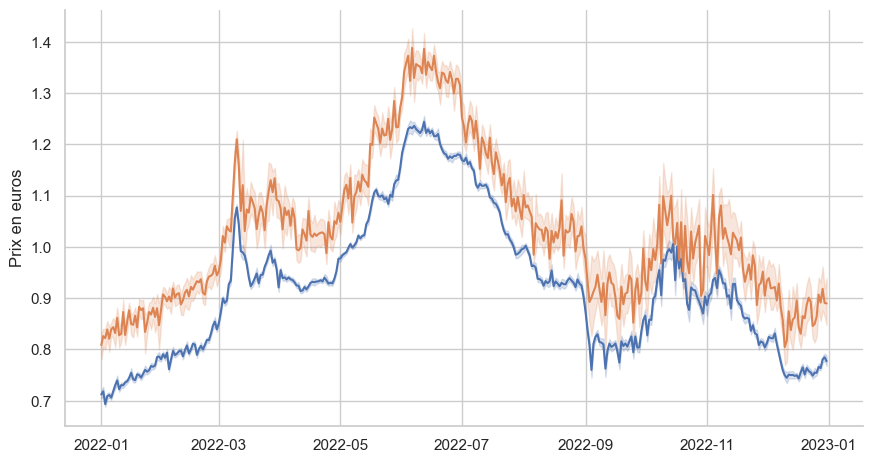

In [137]:
sns.relplot(
    data=df[df.nom_carburant=='SP95-E10'].sample(100000),
    x='maj',
    y='valeur',
    kind='line',
    hue='type',
    aspect=16/9,
    legend=False).set_axis_labels('', 'Prix en euros').set_titles('SP95-E10')